# Produce an ML model for prediction analysis.

In [1]:
# Container Libraries
import numpy as np
import pandas as pd
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# EDA (Exploratory Data Analysis)

In [2]:
#reading the file first
data=pd.read_csv('Demo_Data_loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0


In [3]:
data.shape

(367, 13)

In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan Approved'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Loan Approved      367 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 37.4+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan Approved
count,367.000000,367.000000,362.000000,361.000000,338.000000,367.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444,0.070845
std,4910.685399,2334.232099,61.366652,65.156643,0.380150,0.256915
min,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000,0.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000,0.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000,1.000000


### Data Process

Preprocessing is an essential part before applying any model. It's a vital step since we can't operate with raw data because it'll provide poor results due to erroneous numbers. Before using machine learning or data mining methods, the quality of the data should be evaluated.

In [7]:
#Checking missing values
data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan Approved         0
dtype: int64

In [8]:
#null attributes name
[features for features in data.columns if data[features].isnull().sum()>0]

['Gender',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

<AxesSubplot:>

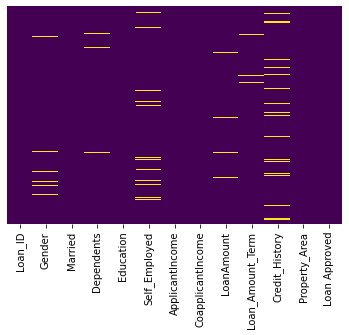

In [9]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis') 

In [10]:
data.shape

(367, 13)

As there are very limited data of of only 367 rows,its better not to remove those data. So I rather took the below mentioned step:
1. The columns that are expected to have Numeric values,the rows NUll values are filled with their mean values using fillna function.

2. The columns that are expected to have Categorical values,the rows NUll values are replaced with '-' this sign which implies that theres no data present for this row.

In [11]:
data = data.fillna(data.mean())
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,0


In [12]:
#Checking rest of the missing values
data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan Approved         0
dtype: int64

In [13]:
#Got finall Data after replacing the NULL values with '-'
Final_data = data.replace(np.nan, '-', regex=True)

In [14]:
Final_data.head()
Final_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan Approved        0
dtype: int64

Now that the Dataset has no missing/inconvenience values, Its ready for further tasks.

In [15]:
#unique values
Final_data.nunique().to_frame(name = 'Count').sort_values(by = 'Count',ascending=False)

,Count
Loan_ID,367
ApplicantIncome,314
CoapplicantIncome,194
LoanAmount,145
Loan_Amount_Term,13
Dependents,5
Gender,3
Self_Employed,3
Credit_History,3
Property_Area,3


In [16]:
data.rename(
    columns={"Loan Approved":"LoanApproved"}
          ,inplace=True)
Final_data.rename(
    columns={"Loan Approved":"LoanApproved"}
          ,inplace=True)

([<matplotlib.patches.Wedge at 0x25056aa3100>,
 [Text(-1.0728678752649374, -0.24280552346373638, '0'),
  Text(1.0728678582151143, 0.24280559880059105, '1')],
 [Text(-0.5852006592354203, -0.13243937643476528, '92.92%'),
  Text(0.5852006499355168, 0.1324394175275951, '7.08%')])

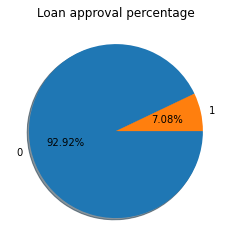

In [17]:
#piechart
area_type=data.LoanApproved.value_counts().index
area_number=data.LoanApproved.value_counts().values
plt.title("Loan approval percentage")
plt.pie(area_number,labels=area_type,autopct='%1.2f%%',
       shadow=True, startangle=0, counterclock=False)


The percentage of occurrences of '0' is more than 12 times that of '1', as seen in the pie chart. As a result, it is possible to conclude that loan approval is extremely rare (for few instances only).

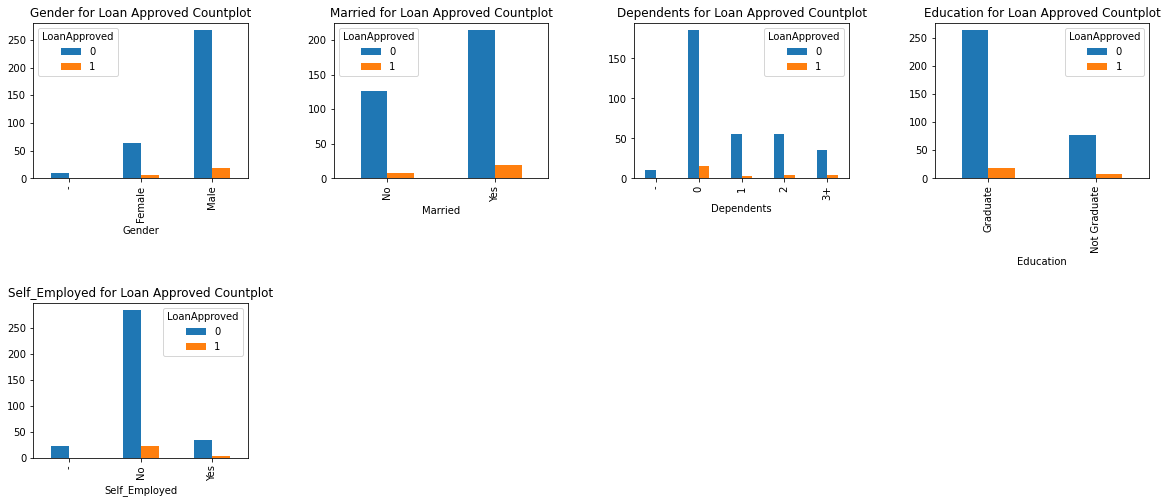

In [18]:
# Crosstab 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area' are put on Y label
def crosstab1(data,Label,lis):
  fig = plt.figure(figsize=(20, 8))
  fig.subplots_adjust(hspace=0.8, wspace=0.4)
 
  for i , col in enumerate(lis):
    ax=plt.subplot(241 + i)
    pd.crosstab(data[col],data['LoanApproved']).plot(kind='bar', ax = ax)
    plt.title(col + Label+' Countplot')
    
  plt.show()
  return

lis = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed']
#crosstab1(df_baseline,' Baseline',lis)
crosstab1(Final_data,' for Loan Approved',lis)

##### Observation
For all catagorical Attributes and the binary Class, bar chart has been plotted. As the rate of class '1' is in less number of amount, the bar chart for class '1' is too small. After analysing these bar charts some facts can be concluded:
1. The number of Male was higher and so their loan approval and denial rate.
2. Majority of the applicant is married people and also got more loan than the unmarried.
3. Among the applicant,most of them are graduated.
4. More than 250 applicant are not self epmloyed.


([<matplotlib.patches.Wedge at 0x25056d72f10>,
 [Text(0.4002049916716938, -1.024615032410251, 'Urban'),
  Text(-1.0662794133559061, 0.2702743285134286, 'Semiurban'),
  Text(0.6396887052488626, 0.8948733767282576, 'Rural')],
 [Text(0.21829363182092387, -0.5588809267692277, '38.15%'),
  Text(-0.5816069527395852, 0.14742236100732467, '31.61%'),
  Text(0.348921111953925, 0.4881127509426859, '30.25%')])

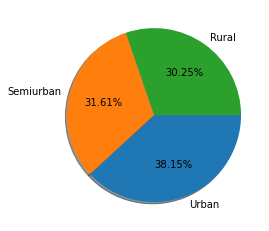

In [19]:
#piechart
area_type=data.Property_Area.value_counts().index
area_number=data.Property_Area.value_counts().values
plt.pie(area_number,labels=area_type,autopct='%1.2f%%',
       shadow=True, startangle=0, counterclock=False)

##### Observation
Applicants are mostly from Urban area and also likely to get more approval than the others. The least number of applicant are from Rural area even though the difference in percentage is not drastically high.

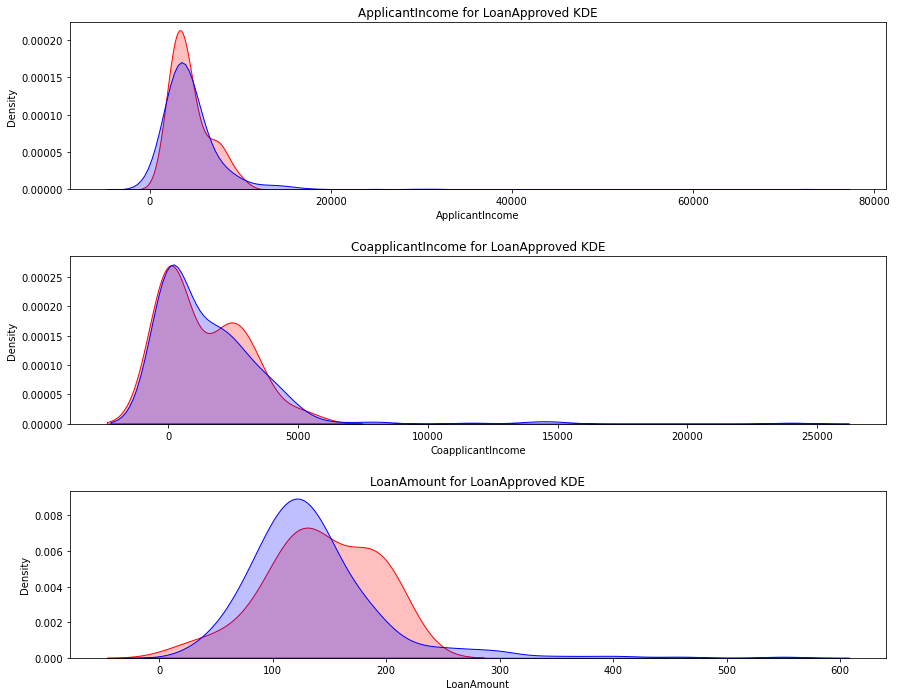

In [20]:
def crosstab_kde(data,Label,lis):
  fig = plt.figure(figsize=(30, 16))
  fig.subplots_adjust(hspace=0.4, wspace=0.05)
  for i , col in enumerate(lis):
    
    ax1 = plt.subplot(422 + i *2)
    ax1 = sns.kdeplot(data[col][data.LoanApproved ==1], shade=True, color="r",label='yes')
    ax1 = sns.kdeplot(data[col][data.LoanApproved ==0], shade=True, color="b",label='no')
    plt.title(col + Label+' KDE')
    
  plt.show()

lis = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
#crosstab_kde(df_baseline,' Baseline',lis)
crosstab_kde(Final_data,' for LoanApproved',lis)

#### Observation
In Python, a crosstab is a tabulation of two different categorical variables. Here, the blue kdeplot is refering to class '1' which means approved and the red kdeplot is refering to class '0'.

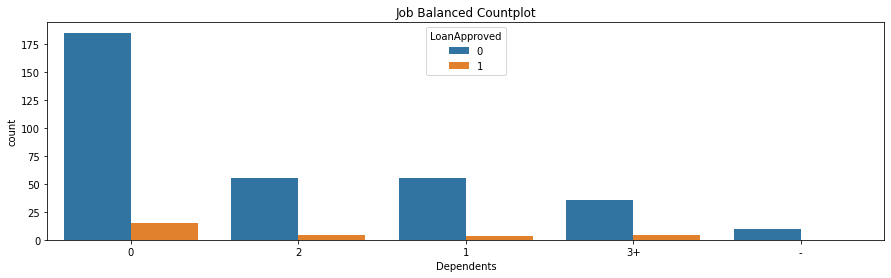

In [21]:
# Countplot job
fig = plt.figure(figsize=(15, 4)) 
sns.countplot(x="Dependents", hue="LoanApproved", data=Final_data, order = Final_data.Dependents.value_counts().index)
plt.title( 'Job Balanced Countplot')
plt.show()

##### Observation
The applicants whose dependents='0',are mostly rejected for loan.

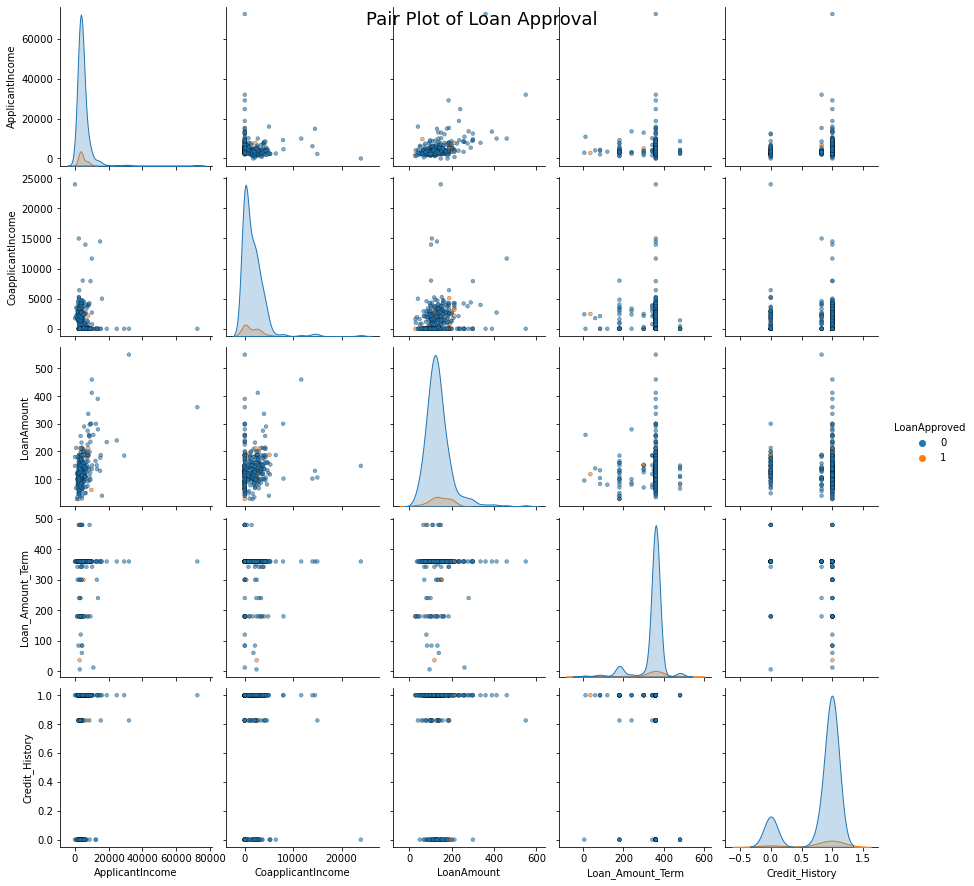

In [22]:
# Pairplot for continuous features 
sns.pairplot(Final_data, hue="LoanApproved", diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 15, 'edgecolor': 'k'})
plt.suptitle('Pair Plot of Loan Approval', size = 18);

#### Correlation Matrix

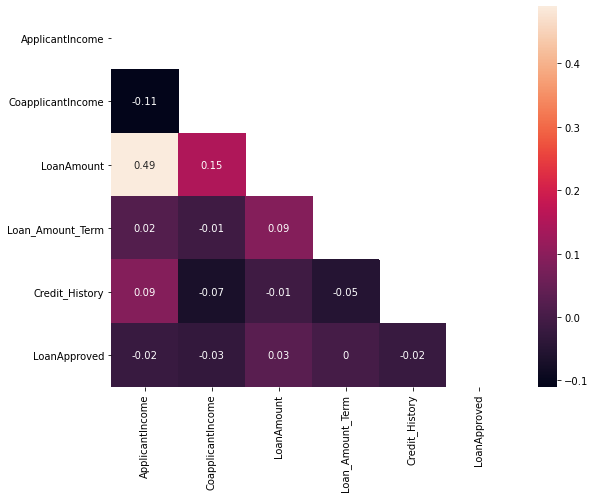

In [23]:
correlation_matrix = data.corr().round(2)

mask = np.zeros_like(correlation_matrix)

mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (9, 7))

sns.heatmap(data=correlation_matrix, annot=True, mask=mask)

plt.show()

 A correlation matrix is simply a table which displays the correlation coefficients for different variables.this matrix consists of rows and columns that show the variables. Each cell in a table contains the correlation coefficient. It has a value between -1 and 1 where:

1. -1 indicates a perfectly negative linear correlation between two variables
2. 0 indicates no linear correlation between two variables
3. 1 indicates a perfectly positive linear correlation between two variables
The further away the correlation coefficient is from zero, the stronger the relationship between the two variables.

the correlation between “LoanApproved” and other variable are all almost near '0', which indicates that they’re basically not correlated. It means, the change of any of the attribute will effect the targated feature hardly as there is very little linear association between LoanApproved and other attributes. However, this is only for a linear relationship. It is possible that the variables have a strong curvilinear relationship.



 
 

#### Nested Pie
In order to display the data in multiple layes and compare within one frame, a nested pie chart has been drawn.

In [24]:
pie_data=Final_data[['Self_Employed','Property_Area','Education']]
pie_data= Final_data.groupby(['Self_Employed','Property_Area','Education']).size().reset_index()
pie_data= pd.pivot_table(pie_data, index=['Self_Employed'], columns=['Property_Area','Education'])
pie_data = pie_data.iloc[1].reset_index()
del pie_data['level_0']
pie_data = pie_data.pivot_table('No',['Property_Area','Education'])
pie_data

No
Property_Area Education       
Rural         Graduate      63
              Not Graduate  22
Semiurban     Graduate      77
              Not Graduate  24
Urban         Graduate      97
              Not Graduate  24

In [25]:
inner_labels=pie_data.index.get_level_values(1)

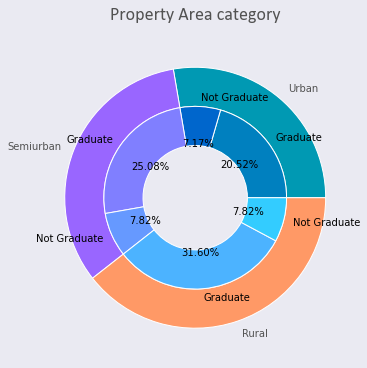

In [26]:
facecolor = '#eaeaf2'
font_color = '#525252'
hfont = {'fontname':'Calibri'}
labels = ['Urban','Semiurban','Rural']
inner_labels=pie_data.index.get_level_values(1)
size = 0.3
vals = pie_data['No']
# Major category values = sum of minor category values
group_sum = pie_data.groupby('Property_Area')['No'].sum()
fig, ax = plt.subplots(figsize=(10,6), facecolor=facecolor)
a,b,c,d,e,f,g,h,i = [plt.cm.winter, plt.cm.cool, plt.cm.spring, plt.cm.copper, plt.cm.bone, plt.cm.gist_heat, plt.cm.pink, plt.cm.summer, plt.cm.autumn]

outer_colors = [a(.6), b(.6), c(.6), d(.6), e(.6), f(.6), g(.6), h(.6), i(.6)]
inner_colors = [a(.5), a(.4), 
                b(.5), b(.4), b(.3), b(.2),
                c(.5), c(.4), c(.3),
                d(.5), d(.4),
                e(.5), e(.4),
                f(.5), f(.4),
                g(.5), g(.4),
                h(.7), h(.6), h(.5), h(.4), h(.3), h(.2), h(.1), h(5),
                i(.7), i(.6), i(.5), i(.4), i(.3), i(.2), i(.1)]
ax.pie(group_sum, 
       radius=1, 
       colors=outer_colors, 
       labels=labels,
       textprops={'color':font_color},
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals,
       radius=1-size, # size=0.3
       colors=inner_colors,
       labels=inner_labels,
       autopct='%1.2f%%',
       wedgeprops=dict(width=size, edgecolor='w'))
ax.set_title('Property Area category', fontsize=18, pad=15, color=font_color, **hfont)
filename = 'mpl-nested-pie'
plt.savefig(filename+'.png', facecolor=facecolor)

##### Observation
The first outer layer relates to the loan applicant's property, while the inner layer refers to the applicants' educational qualifications.
1. The majority of applicant came from urban areas but the majority of graduates, 31.6 percent, come from rural areas.
2. Graduates from urban areas account for 20.52 percent of all applicants' education qualifications, while graduates from Rural areas account for 31.60 percent and graduates from Semiurban areas account for 25.08 percent.
3. The Rural area has the highest percentage of non-graduate candidates (7.82%). Semiurban is in the same boat, with 7.82 percent of the applicant.

# Modeling

In [27]:
# Examine unique values for categoricals
for col in ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area', 'LoanApproved']:
    print(col, '\n', Final_data[col].unique())

Gender 
 ['Male' 'Female' '-']
Married 
 ['Yes' 'No']
Dependents 
 ['0' '1' '2' '3+' '-']
Education 
 ['Graduate' 'Not Graduate']
Self_Employed 
 ['No' 'Yes' '-']
Property_Area 
 ['Urban' 'Semiurban' 'Rural']
LoanApproved 
 [0 1]


In [28]:
#converting cateogircal value to numerics
Final_data['Gender'].replace(['Male', 'Female','-'],[0, 1,2], inplace=True)
Final_data['Married'].replace(['Yes', 'No'],[1, 0], inplace=True)
Final_data['Dependents'].replace(['0', '1','2','3+','-'],[0, 1,2,3,4], inplace=True)
Final_data['Education'].replace(['Graduate', 'Not Graduate'],[1,0], inplace=True)
Final_data['Self_Employed'].replace(['No', 'Yes','-'],[0, 1,2], inplace=True)
Final_data['Property_Area'].replace(['Urban', 'Semiurban','Rural'],[0, 1,2], inplace=True)

In [29]:
#feature matrix:
X=Final_data[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,1,0,5720,0,110.0,360.0,1.000000,0
1,0,1,1,1,0,3076,1500,126.0,360.0,1.000000,0
2,0,1,2,1,0,5000,1800,208.0,360.0,1.000000,0
3,0,1,2,1,0,2340,2546,100.0,360.0,0.825444,0
4,0,0,0,0,0,3276,0,78.0,360.0,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,3,0,1,4009,1777,113.0,360.0,1.000000,0
363,0,1,0,1,0,4158,709,115.0,360.0,1.000000,0
364,0,0,0,1,0,3250,1993,126.0,360.0,0.825444,1
365,0,1,0,1,0,5000,2393,158.0,360.0,1.000000,2


In [30]:
# Target variable
# y = frame['temperature'].astype('int')
y = Final_data['LoanApproved']
y

0      0
1      0
2      0
3      0
4      0
      ..
362    0
363    0
364    0
365    0
366    0
Name: LoanApproved, Length: 367, dtype: int64

In [31]:
data.groupby('LoanApproved').size()

LoanApproved
0    341
1     26
dtype: int64

###### In total, there are 367 applicant, among whom 341 are in class '0' and 26 are in class '1'.

### Splitting data into train and test
From the Data, almost 90% are kept for training and 10% to test and see if the model is good enough to go.

In [41]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split # for splitting dataset
from sklearn import datasets # for using built-in datasets
from sklearn import metrics # for checking the model accuracy
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
from sklearn.naive_bayes import GaussianNB # for Nayev Bayes Algorithm
from sklearn.ensemble import RandomForestClassifier # for Random Forest Model
from tensorflow import keras

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 16)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (330, 11)
X_test shape:  (37, 11)
y_train shape:  (330,)
y_test shape:  (37,)


In [43]:
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train) #train the model with the training dataset
y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
score_loss=metrics.log_loss(y_test,y_prediction_dt)
print("---------------------------------")
print('The accuracy of the Decision Tree is: {}'.format(score_dt))
print('\nThe loss of the DT is: {}'.format(score_loss))
print("---------------------------------")
print(classification_report(y_test,y_prediction_dt))
print("\n---------------------------------")
# save the accuracy score
score = set()
loss= set()
score.add(('Decision Tree', score_dt))
loss.add(('Decision Tree', score_loss))

---------------------------------
The accuracy of the Decision Tree is: 0.8649

The loss of the DT is: 4.667467047752541
---------------------------------
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.25      0.33      0.29         3

    accuracy                           0.86        37
   macro avg       0.59      0.62      0.61        37
weighted avg       0.88      0.86      0.87        37


---------------------------------


In [49]:
model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class
model_knn.fit(X_train, y_train) #train the model with the training dataset
y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
score_loss=metrics.log_loss(y_test,y_prediction_dt)
print("----------------------------------")
print('The accuracy of the K-Nearest Neighbor is: {}'.format(score_knn))
print('\nThe loss of the K-Nearest Neighbor is: {}'.format(score_loss))
print("----------------------------------")
print(classification_report(y_test, y_prediction_dt))
print("---------------------------------")
# save the accuracy score
score.add(('K-Nearest Neighbor', score_knn))

----------------------------------
The accuracy of the K-Nearest Neighbor is: 0.8919

The loss of the K-Nearest Neighbor is: 4.667467047752541
----------------------------------
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.25      0.33      0.29         3

    accuracy                           0.86        37
   macro avg       0.59      0.62      0.61        37
weighted avg       0.88      0.86      0.87        37

---------------------------------


In [50]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train) #train the model with the training dataset
y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
score_loss=metrics.log_loss(y_test,y_prediction_dt)
print("---------------------------------")
print('The accuracy of the Naive bayes model is: {}'.format(score_nb))
print('\nThe loss of the Naive bayes model is: {}'.format(score_loss))
print("---------------------------------")
print(classification_report(y_test, y_prediction_dt))
print("---------------------------------")
# save the accuracy score
score.add(('Naive Bayes', score_nb))

---------------------------------
The accuracy of the Naive bayes model is: 0.8919

The loss of the Naive bayes model is: 4.667467047752541
---------------------------------
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.25      0.33      0.29         3

    accuracy                           0.86        37
   macro avg       0.59      0.62      0.61        37
weighted avg       0.88      0.86      0.87        37

---------------------------------


In [51]:
#Create a Gaussian Classifier
model_rfc=RandomForestClassifier()

model_rfc.fit(X_train, y_train) #train the model with the training dataset
y_prediction_rfc=model_rfc.predict(X_test) #pass the testing data to the trained model

score_rfc = metrics.accuracy_score(y_prediction_rfc, y_test).round(4)
score_loss=metrics.log_loss(y_test,y_prediction_dt)
print("---------------------------------")
print('The accuracy of the Random Forest Classifier is: {}'.format(score_rfc))
print('\nThe loss of the Random Forest Classifier is: {}'.format(score_loss))
print("---------------------------------")
print(classification_report(y_test, y_prediction_dt))
print("---------------------------------")
# save the accuracy score
score.add(('Random Forest Classification', score_rfc))

---------------------------------
The accuracy of the Random Forest Classifier is: 0.9189

The loss of the Random Forest Classifier is: 4.667467047752541
---------------------------------
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.25      0.33      0.29         3

    accuracy                           0.86        37
   macro avg       0.59      0.62      0.61        37
weighted avg       0.88      0.86      0.87        37

---------------------------------


In [52]:
print("The accuracy scores of different Models:")
print("----------------------------------------")
for s in score:
    print(s)

The accuracy scores of different Models:
----------------------------------------
('K-Nearest Neighbor', 0.8919)
('Random Forest Classifier', 0.9189)
('Naive Bayes', 0.8919)
('Random Forest Classification', 0.9189)
('Decision Tree', 0.8649)


### Result:
All the applied model gave accuracy over 80% so they all could predict and classify well.The highest accuracy was from Random Forest cassifier with 91.89%. The KNN and naive Bayes gave exactly same accuracy which is 89.19%. The value of K was taken 3 while applying KNN model. Lastly, Decision Tree gave 86.49% accuracy which is good as well.